In [1]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
dataset = pd.read_csv('Employee.csv')

In [3]:
dataset.shape

(4653, 9)

In [4]:
dataset.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
dataset.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
dataset.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


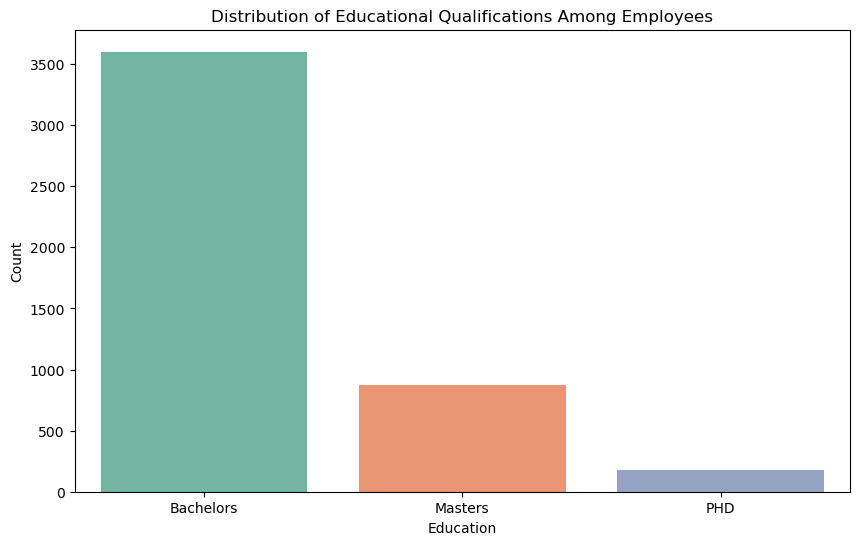

In [8]:
# Creating a count plot for educational qualifications
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=dataset, palette='Set2')
plt.title('Distribution of Educational Qualifications Among Employees')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

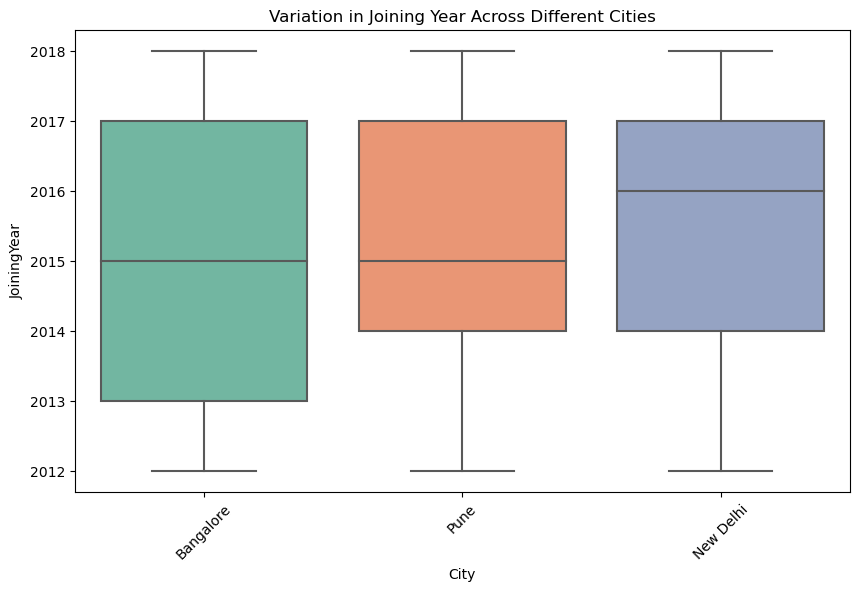

In [9]:
# Creating a box plot to visualize the variation in joining year across different cities
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='JoiningYear', data=dataset, palette='Set2')
plt.title('Variation in Joining Year Across Different Cities')
plt.xlabel('City')
plt.ylabel('JoiningYear')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

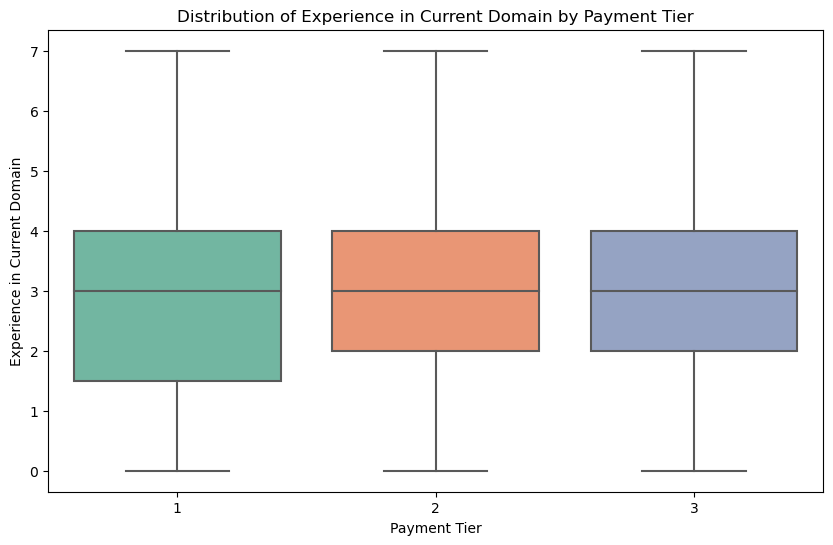

In [10]:
# Creating a box plot to visualize the distribution of experience within each payment tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='PaymentTier', y='ExperienceInCurrentDomain', data=dataset, palette='Set2')
plt.title('Distribution of Experience in Current Domain by Payment Tier')
plt.xlabel('Payment Tier')
plt.ylabel('Experience in Current Domain')
plt.show()

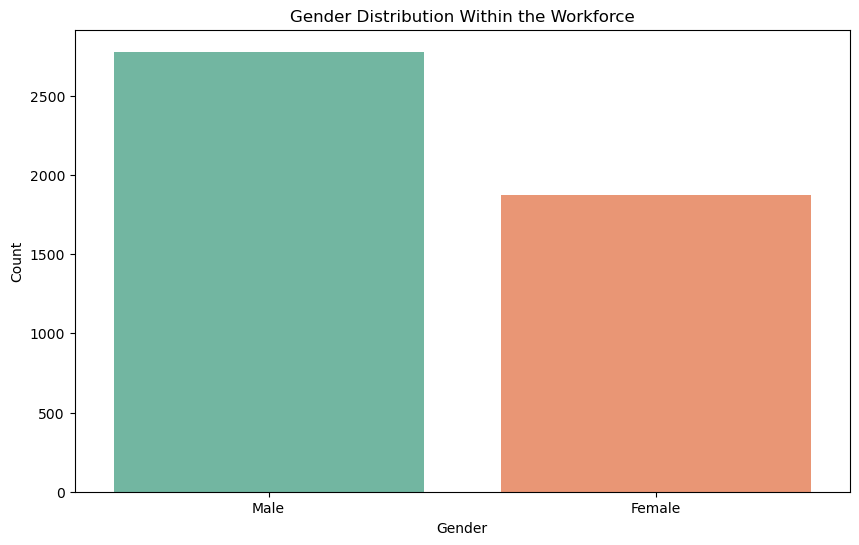

In [11]:
# Creating a count plot to visualize the gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=dataset, palette='Set2')
plt.title('Gender Distribution Within the Workforce')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

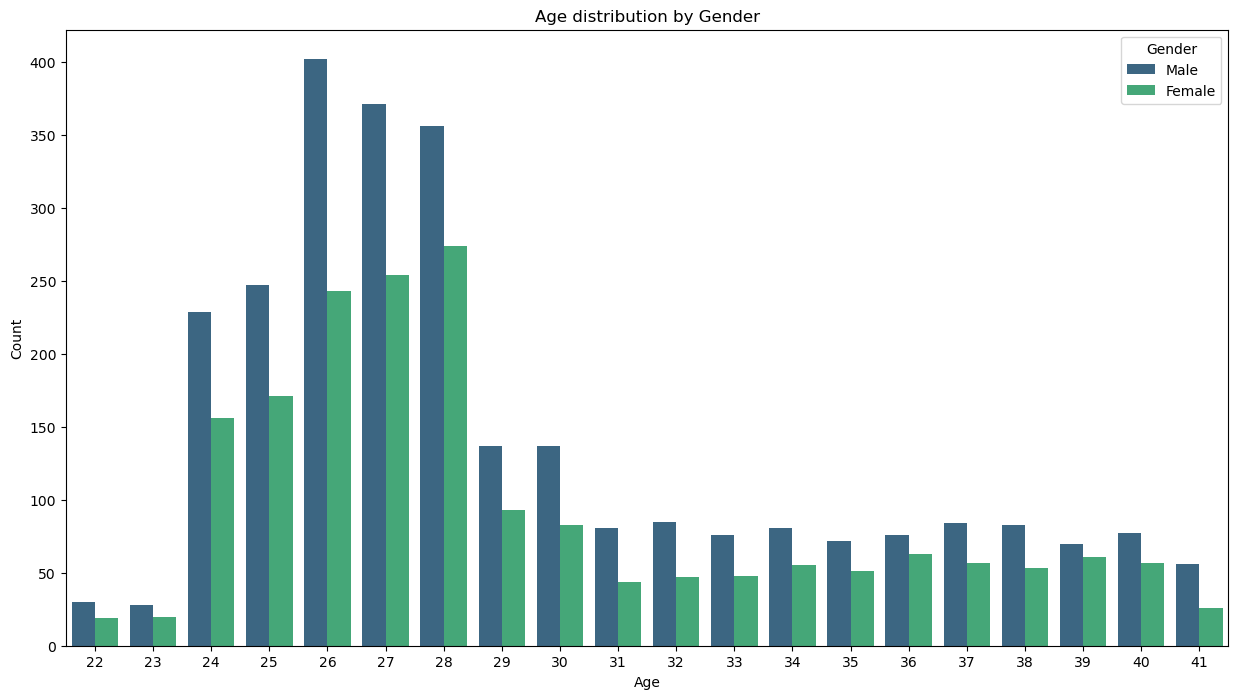

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(data=dataset, x='Age', hue="Gender", palette='viridis')

plt.title('Age distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

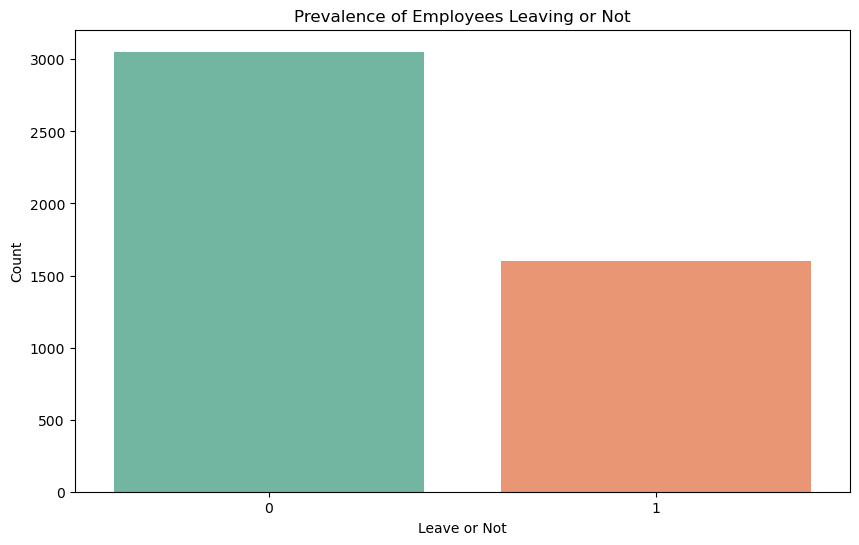

In [13]:
# Creating a count plot to visualize the prevalence of employees leaving or not
plt.figure(figsize=(10, 6))
sns.countplot(x='LeaveOrNot', data=dataset, palette='Set2')
plt.title('Prevalence of Employees Leaving or Not')
plt.xlabel('Leave or Not')
plt.ylabel('Count')
plt.show()

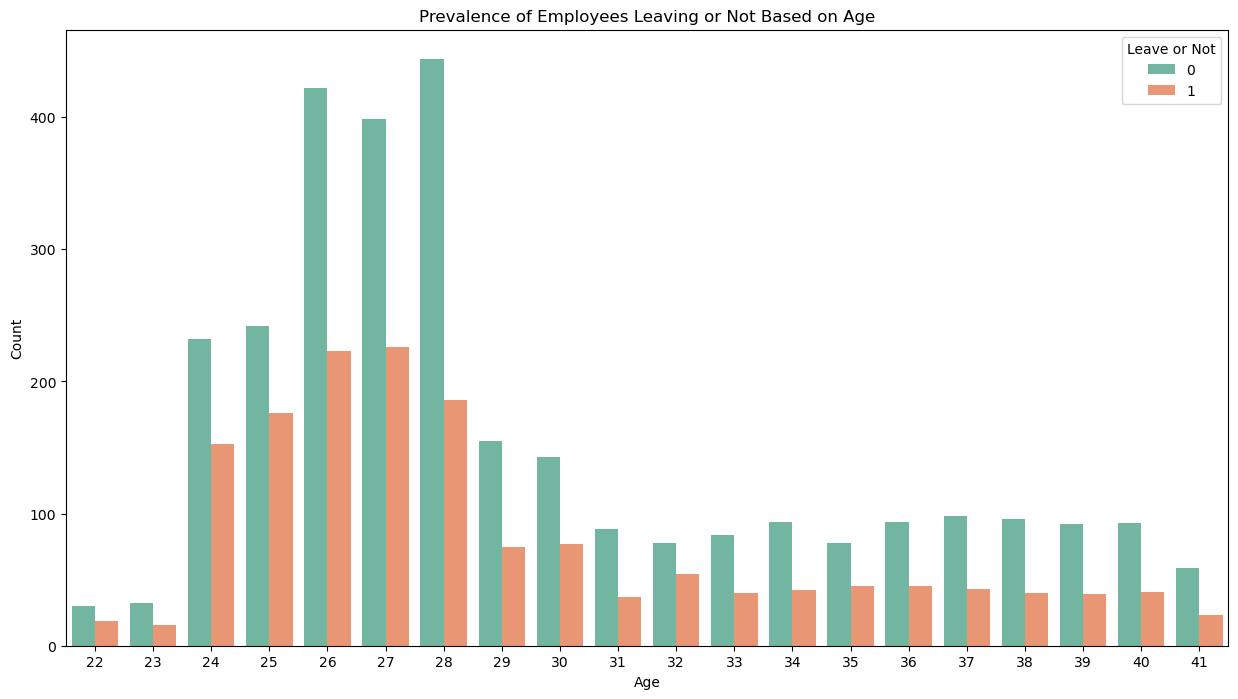

In [14]:
# Creating a count plot to visualize the prevalence of employees leaving or not based on age
plt.figure(figsize=(15, 8))
sns.countplot(data=dataset, x='Age', hue='LeaveOrNot', palette='Set2')
plt.title('Prevalence of Employees Leaving or Not Based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Leave or Not')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

# Dropping the target column
E = dataset.drop(columns=['LeaveOrNot'])

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Applying LabelEncoder to the categorical variables
E['Education'] = label_encoder.fit_transform(E['Education'])
E['City'] = label_encoder.fit_transform(E['City'])
E['Gender'] = label_encoder.fit_transform(E['Gender'])
E['EverBenched'] = label_encoder.fit_transform(E['EverBenched'])

In [18]:
print(E)

      Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
0             0         2017     0            3   34       1            0   
1             0         2013     2            1   28       0            0   
2             0         2014     1            3   38       0            0   
3             1         2016     0            3   27       1            0   
4             1         2017     2            3   24       1            1   
...         ...          ...   ...          ...  ...     ...          ...   
4648          0         2013     0            3   26       0            0   
4649          1         2013     2            2   37       1            0   
4650          1         2018     1            3   27       1            0   
4651          0         2012     0            3   30       1            1   
4652          0         2015     0            3   33       1            1   

      ExperienceInCurrentDomain  
0                             0  
1      

In [19]:
X = E.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
y = dataset.iloc[: ,8].values

In [20]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4653, 8)
Shape of y: (4653,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [23]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [24]:
# predicting the Test set results
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 1 0 ... 0 0 0]


In [25]:
# Setting the printing options to display all elements
np.set_printoptions(threshold=np.inf)

# Predicting the test set results
y_pred = classifier.predict(X_test_s)

# Printing the predicted values
print(y_pred)

[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1
 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 

In [26]:
print(y_test)

[1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 

In [27]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.81


Confusion Matrix:
[[842  80]
 [190 284]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       922
           1       0.78      0.60      0.68       474

    accuracy                           0.81      1396
   macro avg       0.80      0.76      0.77      1396
weighted avg       0.80      0.81      0.80      1396



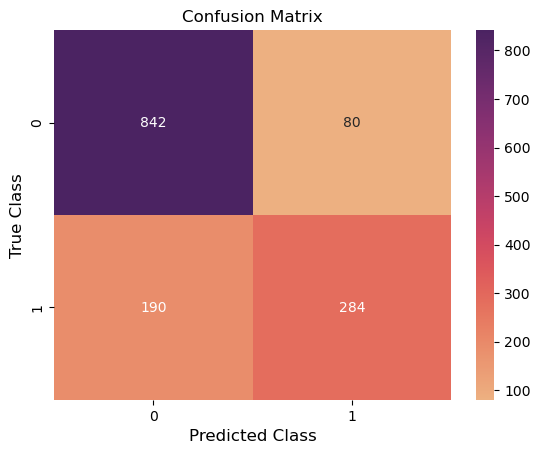

In [28]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)

plt.show()

In [29]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
# predicting the Test set results
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 1 0 

In [31]:
print(y_test)

[1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 

In [32]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.81


Confusion Matrix:
[[809 113]
 [153 321]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       922
           1       0.74      0.68      0.71       474

    accuracy                           0.81      1396
   macro avg       0.79      0.78      0.78      1396
weighted avg       0.81      0.81      0.81      1396



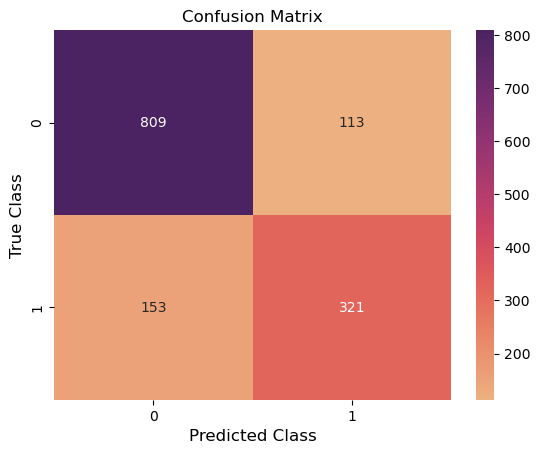

In [33]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)

plt.show()